<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://github.com/googlecolab/colabtools/issues/85#issuecomment-372532728
# Bibliotecas necessárias para instalação do cartopy e geoplot
!apt-get install -y -qq libproj-dev proj-data proj-bin
!apt-get install -y -qq libgeos-dev

!pip install -q -U cartopy
!pip install -q -U geopandas
!pip install -q -U geoplot

In [0]:
import pandas as pd
import mapclassify
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

In [0]:
stations_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115089&authkey=AN3WuZnSKh9jgC8")
inmetr_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115090&authkey=AHJ7x3UN1MzJW1M")

In [4]:
df = pd.merge(stations_df, inmetr_df, on='id')
df

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,date,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-04 00:00:00,NaN,NaN,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.75,NaN
1,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-04 12:00:00,NaN,25.3,24.0,NaN,23.7,90.0,1005.9,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN
2,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-04 18:00:00,NaN,29.2,27.1,NaN,NaN,85.0,1004.2,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN
3,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-05 00:00:00,NaN,25.0,27.0,32.6,NaN,92.0,1007.5,NaN,NaN,NaN,NaN,8.00,2.4,88.25,NaN
4,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,1970-05-05 12:00:00,0.0,25.9,24.8,NaN,23.0,91.0,1006.4,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14528633,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-29 12:00:00,5.0,21.5,NaN,NaN,20.9,86.0,945.2,1011.5,5.0,1.02888,NaN,10.00,NaN,NaN,NaN
14528634,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-30 00:00:00,NaN,22.3,NaN,30.2,NaN,97.0,945.0,1011.9,0.0,0.00000,9.0,7.50,NaN,NaN,0.0
14528635,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-30 12:00:00,1.7,26.0,NaN,NaN,21.2,76.0,944.7,1011.2,0.0,0.00000,NaN,6.25,NaN,NaN,NaN
14528636,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,2018-12-31 00:00:00,NaN,23.2,NaN,30.0,NaN,90.0,945.2,1011.7,0.0,0.00000,0.0,10.00,NaN,NaN,0.0


In [0]:
!wget https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_BRA_shp.zip
!unzip gadm36_BRA_shp.zip

In [0]:
br = gpd.read_file('gadm36_BRA_1.shp') # 0=país, 1=estado, 2=cidade

In [0]:
# Preparando os dados para geração dos mapas enquanto a análise numérica não é finalizada.
#tair_df = df[['date', 'lat', 'lon', 'tair']].sort_values(by=['date'])
df_sorted = df.sort_values(by=['date'])
tair_df_2018_08 = df_sorted[(tair_df['date'] >= '2018-08-01') & (tair_df['date'] <= '2018-08-31')]
tair_lst_2018_08 = [v for k, v in tair_df_2018_08.groupby('date')]

tair_df_2018_08_01_00 = tair_lst_2018_08[0]
gdf_2018_08_01_00 = gpd.GeoDataFrame(
    tair_df_2018_08_01_00, 
    geometry=gpd.points_from_xy(tair_df_2018_08_01_00.lon, tair_df_2018_08_01_00.lat))

/usr/local/lib/python3.6/dist-packages/geoplot/geoplot.py:612: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  extent = gpd.GeoSeries(self.extent) if self.extent is not None else None


Text(0.5, 1.0, 'Mapa de ???, 08/01/2018 00:00')

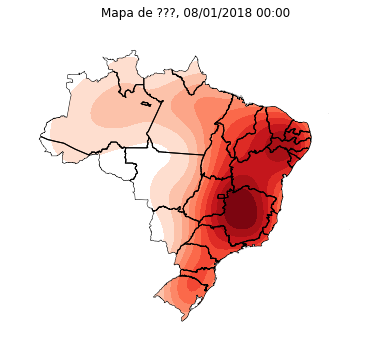

In [64]:
# Plotagem dos gráficos.
# TODO: iterar sobre a lista e gerar o .gif.
# O plot desejado contém o parâmetro clip, mas, como a função demora a plotar 
# o gráfico quando esse parâmetro é enviado, usamos um plot sem ele apenas 
# para testes.

#ax = gplt.kdeplot(gdf_2018_08_01_00[gdf_2018_08_01_00['tair'] > 0], shade=True, cmap='Reds')
ax = gplt.kdeplot(gdf_2018_08_01_00[gdf_2018_08_01_00['tair'] > 0], clip=br.geometry, shade=True, cmap='Reds')
gplt.polyplot(br, zorder=1, ax=ax)
plt.title("Mapa de ???, 08/01/2018 00:00")